<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting started with data cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final_Project_PapaJohns/All_years.csv')

<ipython-input-2-44878571b353>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Final_Project_PapaJohns/All_years.csv')


In [3]:
df

,Date,Month,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Is_original
0,2022-01-01,1,0.0,NaN,67,NaN,14328.0,1,4.95,0.0,4.95,1
1,2022-01-01,1,0.0,NaN,67,NaN,14354.0,2,9.90,0.0,9.90,1
2,2022-01-01,1,1.0,פיצות מיוחדות 14',4,ביאנקה 14' [],14321.0,1,85.90,0.0,85.90,1
3,2022-01-01,1,1.0,פיצות מיוחדות 14',7,טוסקנית 14' [],14304.0,1,85.90,0.0,85.90,1
4,2022-01-01,1,1.0,פיצות מיוחדות 14',13,המומלצת 14' [],14358.0,1,89.90,0.0,89.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...
258189,2024-12-31,12,52,מנות נלוות,3117,שובר 50 שח DV,7669633.0,5,125.00,0.0,125.00,1
258190,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669582.0,1,0.00,0.0,0.00,1
258191,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.90,0.0,19.90,1
258192,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.90,0.0,19.90,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258194 entries, 0 to 258193
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         255734 non-null  object 
 1   Month        258194 non-null  int64  
 2   סוג פריט     256298 non-null  object 
 3   תאור סוג     239152 non-null  object 
 4   מס' פריט     258194 non-null  object 
 5   תאור פריט    257188 non-null  object 
 6   הזמנה        256298 non-null  float64
 7   כמות         258194 non-null  int64  
 8   סכום         256978 non-null  float64
 9   הנחה לפריט   258194 non-null  float64
 10  אחרי הנחה    257946 non-null  float64
 11  Is_original  258194 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 23.6+ MB


## Deleting missing values

In [5]:
df.dropna(inplace=True)

In [6]:
df = df[df["כמות"] >= 0]

## Convert Date to date format

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-7-4ac1f8d99197>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [8]:
weekday_map = {
    0: 'שני',
    1: 'שלישי',
    2: 'רביעי',
    3: 'חמישי',
    4: 'שישי',
    5: 'שבת',
    6: 'ראשון'}

In [9]:
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

df['Is_Weekend'] = df['Weekday'].isin([4, 5]).astype(int)
df['Day_Name'] = df['Weekday'].map(weekday_map)

<ipython-input-9-b9d4f4d00aa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-9-b9d4f4d00aa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
<ipython-input-9-b9d4f4d00aa4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [10]:
df.tail(3)

,Date,Month,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Is_original,Year,Day,Weekday,Is_Weekend,Day_Name
258191,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.9,0.0,19.9,1,2024,31,1,0,שלישי
258192,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9,0.0,19.9,1,2024,31,1,0,שלישי
258193,2024-12-31,12,52,מנות נלוות,3210,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669633.0,3,384.0,0.0,384.0,1,2024,31,1,0,שלישי


In [11]:
columns_order = [
    'Date',
    'Year',
    'Month',
    'Day',
    'Day_Name',
    'Is_Weekend',
    'תאור פריט',
    'הזמנה',
    'כמות',
    'סכום',]

df_all_years = df[columns_order].copy()

In [12]:
df_all_years.tail(3)

,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,הזמנה,כמות,סכום
258191,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.9
258192,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9
258193,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669633.0,3,384.0


## Daily summary of orders

In [13]:
daily_summary = df_all_years.groupby('Date').agg({
    'כמות': 'sum',
    'סכום': 'sum',
    'הזמנה': pd.Series.nunique,
    'Is_Weekend': 'first',
}).reset_index()

# שינוי שמות עמודות לנוחות
daily_summary.rename(columns={
    'כמות': 'Total_Quantity',
    'סכום': 'Total_Amount',
    'הזמנה': 'Unique_Orders'}, inplace=True)

daily_summary.sample(3)

,Date,Total_Quantity,Total_Amount,Unique_Orders,Is_Weekend
250,2023-06-12,414,9112.85,78,0
497,2024-07-25,637,11736.20,118,0
98,2023-01-09,345,6437.40,64,0


In [14]:
df_all_years

,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,הזמנה,כמות,סכום
2,2022-01-01,2022,1,1,שבת,1,ביאנקה 14' [],14321.0,1,85.9
3,2022-01-01,2022,1,1,שבת,1,טוסקנית 14' [],14304.0,1,85.9
4,2022-01-01,2022,1,1,שבת,1,המומלצת 14' [],14358.0,1,89.9
5,2022-01-01,2022,1,1,שבת,1,טוסקנית בצק דק 14' [],14323.0,1,85.9
6,2022-01-01,2022,1,1,שבת,1,טוסקנית בצק דק 14' [],14355.0,1,85.9
...,...,...,...,...,...,...,...,...,...,...
258189,2024-12-31,2024,12,31,שלישי,0,שובר 50 שח DV,7669633.0,5,125.0
258190,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669582.0,1,0.0
258191,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.9
258192,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9


In [15]:
df_all_years["תאור פריט"].unique()

array(["ביאנקה 14'  []", "טוסקנית  14' []", "המומלצת  14' []",
       "טוסקנית בצק דק 14' []", "היוונית דקה 14' []", "פאפא מיקס  14' []",
       "פאפא מיקס דקה 14' []", "עקיצת הדבורה דקה 14' []",
       "סופר מרגריטה  דקה 14' []", "פיצה ורסיה צמחונית 14' []",
       "טוסקנית 8' []", "היוונית 8' []", "האיטלקית החריפה 8' []",
       'אצבעות גבינה', "צ'יזי רול", 'נגיסי תירס', 'ספייסי רולס',
       'פפיוני שום פרמזן', 'בלונדי בריבוע', 'עוגת ריקוטה', 'קינוח חגיגי',
       'קוקה קולה 1.5 ליטר', 'קולה זירו 1.5 ליטר', 'דיאט קולה 1.5 ליטר',
       'פיוז טי אפרסק 1.5 ליטר', 'ספרייט זירו 1.5 ליטר',
       'ספרייט 1.5 ליטר', "פיוז טי אפרסק 500 מ'ל",
       "מים מינרלים נביעות 500 מ'ל", 'פחית קוקה קולה', 'פחית קולה זירו',
       'פחית ספרייט זירו', 'רוטב פיצה קטן', 'רוטב ברביקיו קטן',
       "רוטב צ'ילי מתוק קטן", 'רוטב שום קטן', 'מארז רטבים',
       'תבלין איטלקי קטן', 'רוטב שום פרמזן קטן', 'אננס', 'פטריות', 'תירס',
       'זיתים ירוקים', 'בצל לבן', 'פלפל ירוק', 'בולגרית', 'עגבניות',
       'זיתי 

In [16]:
main_dishes_keywords = ['ביאנקה', 'טוסקנית', 'היוונית', 'הצמחונית', 'קריביאן', 'פפרוני ספיישל', 'טוליפ', 'סופר פאפא' , 'המומלצת', 'הבשרית', 'קלאסית', 'מרגריטה', 'האיטלקית', 'ספייסי רול', 'מוצרלה סטיקס', 'הקשה של הפיצה',
                        'פפיוני שום פרמזן', 'טבעות', 'לחמעג\'ון', 'צ\'יזי רול', 'נאגטס', 'נגיסי', 'פיצה', 'פיצות', 'משפחתית', 'משפחתי', 'אישית', 'איטסיין', 'פריקסה', 'סופר פאפא', 'קראסט', 'כדורי פירה', 'הוט-דוג', 'כדורי בשר',
                        'ארוחה', 'ארוחות', 'פאפאדיאס', 'קלאסי', 'הבלקנית', 'הספרדית', 'הצרפתית', 'סלופי', 'מנה', 'ציפס', '8', '14', '16', 'בייטס', 'עקיצת הדבורה']
Desserts_keywords = ['קראנצ', 'פיסטוק', 'בייגלה', 'קרמל', 'שוקולד', 'בלונדי', 'ריקוטה', 'עוגיות', 'גלידה', 'גלידות', 'מגנום', 'קינוח', 'וניל', 'דולצה', 'צ\'אנקי', 'בראוניס', 'טופי', 'אוראו', 'מקופלת',
                     'אגוזי', 'קליק', 'קרם', 'נוגט', 'פירות', 'שמנת', 'קינדר', 'רול']
Toppings_keywords = ['זית', 'תירס', 'אננס', 'בצל', 'פטריות', 'עגבניות', 'גמבה', 'פלפל', 'חלפיניו', 'גבינה', 'גבינות', 'תוספת', 'ארטישוק', 'בולגרית', 'טונה', 'אנשובי', 'פפרוני', 'מוצרלה', 'פפרוצ\'יני',
                     'קלמטה', 'עיזים', 'חצי', 'תוספות']
sauces_keywords = ["רוטב", "מארז רטבים", "תבלין", 'אורגנו']
drinks_keywords = ["קולה", "מים", "ספרייט", "פחית", "זירו", "מונסטר", "פריגת", "פיוז טי", "משקה", "שתייה", 'פאנטה', 'שתיה']

In [17]:
def categorize_item(description):
    if pd.isna(description):
        return "אחר"

    desc = description.lower()

    if any(word in desc for word in main_dishes_keywords):
        return "מנה עיקרית"
    elif any(word in desc for word in Desserts_keywords):
        return "קינוח"
    elif any(word in desc for word in Toppings_keywords):
        return "תוספת"
    elif any(word in desc for word in sauces_keywords):
        return "רוטב"
    elif any(word in desc for word in drinks_keywords):
        return "שתייה"
    else:
        return "אחר"

In [18]:
import re

def split_description(text):
    if pd.isna(text):
        return []
    text = text.lower()
    return re.split(r'\+|/|&| ו ', text)  # מחלק לפי תווים שמחברים פריטים

In [19]:
def categorize_components(text):
    components = split_description(text)
    categories = set()

    for comp in components:
        cat = categorize_item(comp.strip())
        if cat != "אחר":
            categories.add(cat)

    return list(categories) if categories else ["אחר"]

In [20]:
df_all_years["קטגוריות בתיאור"] = df_all_years["תאור פריט"].apply(categorize_components)

In [21]:
df_exploded = df_all_years.explode("קטגוריות בתיאור").copy()
df_exploded.rename(columns={"קטגוריות בתיאור": "קטגוריה"}, inplace=True)

In [22]:
df_exploded["Date"] = pd.to_datetime(df_exploded["Date"], errors="coerce")
df_exploded["Month"] = df_exploded["Date"].dt.to_period("M")

# סכימת ביקוש לפי קטגוריה וחודש
monthly_demand_by_category = (
    df_exploded.groupby(["Month", "קטגוריה"])["כמות"]
    .sum()
    .unstack()
    .fillna(0))

In [23]:
df_all_years

,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,הזמנה,כמות,סכום,קטגוריות בתיאור
2,2022-01-01,2022,1,1,שבת,1,ביאנקה 14' [],14321.0,1,85.9,[מנה עיקרית]
3,2022-01-01,2022,1,1,שבת,1,טוסקנית 14' [],14304.0,1,85.9,[מנה עיקרית]
4,2022-01-01,2022,1,1,שבת,1,המומלצת 14' [],14358.0,1,89.9,[מנה עיקרית]
5,2022-01-01,2022,1,1,שבת,1,טוסקנית בצק דק 14' [],14323.0,1,85.9,[מנה עיקרית]
6,2022-01-01,2022,1,1,שבת,1,טוסקנית בצק דק 14' [],14355.0,1,85.9,[מנה עיקרית]
...,...,...,...,...,...,...,...,...,...,...,...
258189,2024-12-31,2024,12,31,שלישי,0,שובר 50 שח DV,7669633.0,5,125.0,[אחר]
258190,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669582.0,1,0.0,"[מנה עיקרית, תוספת]"
258191,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.9,"[מנה עיקרית, תוספת]"
258192,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9,"[מנה עיקרית, תוספת]"


In [24]:
def extract_quantity_by_keywords(text):
    if pd.isna(text):
        return {}

    text = text.lower()
    result = {}

    # מיפוי קטגוריות לרשימות מילות מפתח
    category_keywords = {
        "מנה עיקרית": main_dishes_keywords,
        "תוספת": Toppings_keywords,
        "שתייה": drinks_keywords,
        "רוטב": sauces_keywords,
        "קינוח": Desserts_keywords
    }

    for category, keywords in category_keywords.items():
        for kw in keywords:
            # מחפש ביטוי כמו: "2 פיצות", "3 בצל", "1 פיוז טי"
            pattern = rf"(\d+)\s*{re.escape(kw)}"
            matches = re.findall(pattern, text)
            for m in matches:
                num = int(m)
                result[category] = result.get(category, 0) + num

    return result

In [25]:
df_all_years["כמות בפועל"] = df_all_years["תאור פריט"].apply(extract_quantity_by_keywords)

In [26]:
df_all_years

,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,הזמנה,כמות,סכום,קטגוריות בתיאור,כמות בפועל
2,2022-01-01,2022,1,1,שבת,1,ביאנקה 14' [],14321.0,1,85.9,[מנה עיקרית],{}
3,2022-01-01,2022,1,1,שבת,1,טוסקנית 14' [],14304.0,1,85.9,[מנה עיקרית],{}
4,2022-01-01,2022,1,1,שבת,1,המומלצת 14' [],14358.0,1,89.9,[מנה עיקרית],{}
5,2022-01-01,2022,1,1,שבת,1,טוסקנית בצק דק 14' [],14323.0,1,85.9,[מנה עיקרית],{}
6,2022-01-01,2022,1,1,שבת,1,טוסקנית בצק דק 14' [],14355.0,1,85.9,[מנה עיקרית],{}
...,...,...,...,...,...,...,...,...,...,...,...,...
258189,2024-12-31,2024,12,31,שלישי,0,שובר 50 שח DV,7669633.0,5,125.0,[אחר],{}
258190,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669582.0,1,0.0,"[מנה עיקרית, תוספת]","{'מנה עיקרית': 2, 'תוספת': 2}"
258191,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669585.0,1,19.9,"[מנה עיקרית, תוספת]","{'מנה עיקרית': 2, 'תוספת': 2}"
258192,2024-12-31,2024,12,31,שלישי,0,2 משפחתיות קלאסיות + 2 תוספות צמחוניות חבר,7669605.0,1,19.9,"[מנה עיקרית, תוספת]","{'מנה עיקרית': 2, 'תוספת': 2}"


In [27]:
def find_phrase_in_text(text, keywords):
    for kw in keywords:
        if kw in text:
            # חפש מיקום המילה בטקסט
            pattern = rf"(\d+\s*[\w\s\-'״״\"׳]*{re.escape(kw)}[\w\s\-'״״\"׳]*)"
            match = re.search(pattern, text)
            if match:
                return match.group(1).strip()
    return None

In [28]:
rows = []

for _, row in df_all_years.iterrows():
    base_data = row.drop(["כמות בפועל", "תאור פריט", "כמות"]).to_dict()
    original_text = row["תאור פריט"].lower() if pd.notna(row["תאור פריט"]) else ""
    quantity_dict = row["כמות בפועל"]
    default_qty = row["כמות"]

    if quantity_dict:
        for category, qty in quantity_dict.items():
            new_row = base_data.copy()

            # שולף קטע רלוונטי מהתיאור לפי קטגוריה
            if category == "מנה עיקרית":
                phrase = find_phrase_in_text(original_text, main_dishes_keywords)
            elif category == "תוספת":
                phrase = find_phrase_in_text(original_text, Toppings_keywords)
            elif category == "שתייה":
                phrase = find_phrase_in_text(original_text, drinks_keywords)
            elif category == "רוטב":
                phrase = find_phrase_in_text(original_text, sauces_keywords)
            elif category == "קינוח":
                phrase = find_phrase_in_text(original_text, Desserts_keywords)
            else:
                phrase = None

            new_row["תאור פריט"] = phrase if phrase else f"{qty} {category}"
            new_row["כמות"] = qty
            rows.append(new_row)

    else:
        new_row = base_data.copy()
        new_row["תאור פריט"] = row["תאור פריט"]
        new_row["כמות"] = default_qty
        rows.append(new_row)

df_split = pd.DataFrame(rows)

In [29]:
df_split

,Date,Year,Month,Day,Day_Name,Is_Weekend,הזמנה,סכום,קטגוריות בתיאור,תאור פריט,כמות
0,2022-01-01,2022,1,1,שבת,1,14321.0,85.9,[מנה עיקרית],ביאנקה 14' [],1
1,2022-01-01,2022,1,1,שבת,1,14304.0,85.9,[מנה עיקרית],טוסקנית 14' [],1
2,2022-01-01,2022,1,1,שבת,1,14358.0,89.9,[מנה עיקרית],המומלצת 14' [],1
3,2022-01-01,2022,1,1,שבת,1,14323.0,85.9,[מנה עיקרית],טוסקנית בצק דק 14' [],1
4,2022-01-01,2022,1,1,שבת,1,14355.0,85.9,[מנה עיקרית],טוסקנית בצק דק 14' [],1
...,...,...,...,...,...,...,...,...,...,...,...
239514,2024-12-31,2024,12,31,שלישי,0,7669585.0,19.9,"[מנה עיקרית, תוספת]",2 תוספות צמחוניות חבר,2
239515,2024-12-31,2024,12,31,שלישי,0,7669605.0,19.9,"[מנה עיקרית, תוספת]",2 משפחתיות קלאסיות,2
239516,2024-12-31,2024,12,31,שלישי,0,7669605.0,19.9,"[מנה עיקרית, תוספת]",2 תוספות צמחוניות חבר,2
239517,2024-12-31,2024,12,31,שלישי,0,7669633.0,384.0,"[מנה עיקרית, תוספת]",2 משפחתיות קלאסיות,2


In [30]:
def clean_description_keep_numbers(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    # נשאיר מספרים! רק ננקה תווים מיותרים
    text = re.sub(r"[\[\]\"\'\+\-\(\)\.,]", "", text)
    text = re.sub(r"\s{2,}", " ", text)  # רווחים כפולים
    return text.strip()

In [31]:
df_split["תיאור פריט מנוקה"] = df_split["תאור פריט"].apply(clean_description_keep_numbers)

In [32]:
df_split = df_split[~df_split["תיאור פריט מנוקה"].str.startswith("בלי")]

In [33]:
df_split

,Date,Year,Month,Day,Day_Name,Is_Weekend,הזמנה,סכום,קטגוריות בתיאור,תאור פריט,כמות,תיאור פריט מנוקה
0,2022-01-01,2022,1,1,שבת,1,14321.0,85.9,[מנה עיקרית],ביאנקה 14' [],1,ביאנקה 14
1,2022-01-01,2022,1,1,שבת,1,14304.0,85.9,[מנה עיקרית],טוסקנית 14' [],1,טוסקנית 14
2,2022-01-01,2022,1,1,שבת,1,14358.0,89.9,[מנה עיקרית],המומלצת 14' [],1,המומלצת 14
3,2022-01-01,2022,1,1,שבת,1,14323.0,85.9,[מנה עיקרית],טוסקנית בצק דק 14' [],1,טוסקנית בצק דק 14
4,2022-01-01,2022,1,1,שבת,1,14355.0,85.9,[מנה עיקרית],טוסקנית בצק דק 14' [],1,טוסקנית בצק דק 14
...,...,...,...,...,...,...,...,...,...,...,...,...
239514,2024-12-31,2024,12,31,שלישי,0,7669585.0,19.9,"[מנה עיקרית, תוספת]",2 תוספות צמחוניות חבר,2,2 תוספות צמחוניות חבר
239515,2024-12-31,2024,12,31,שלישי,0,7669605.0,19.9,"[מנה עיקרית, תוספת]",2 משפחתיות קלאסיות,2,2 משפחתיות קלאסיות
239516,2024-12-31,2024,12,31,שלישי,0,7669605.0,19.9,"[מנה עיקרית, תוספת]",2 תוספות צמחוניות חבר,2,2 תוספות צמחוניות חבר
239517,2024-12-31,2024,12,31,שלישי,0,7669633.0,384.0,"[מנה עיקרית, תוספת]",2 משפחתיות קלאסיות,2,2 משפחתיות קלאסיות


In [34]:
df_split["כמות"].describe()

,כמות
count,236961.000000
mean,1.271564
std,0.761156
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,80.000000


In [35]:
df_split[df_split["כמות"] >3].sort_values("כמות", ascending=False)

,Date,Year,Month,Day,Day_Name,Is_Weekend,הזמנה,סכום,קטגוריות בתיאור,תאור פריט,כמות,תיאור פריט מנוקה
175033,2024-07-15,2024,7,15,שני,0,7653832.0,5832.0,[מנה עיקרית],קלאסית דקה 14' [],80,קלאסית דקה 14
136879,2024-03-28,2024,3,28,חמישי,0,7644193.0,0.0,[רוטב],עם אורגנו,54,עם אורגנו
136848,2024-03-28,2024,3,28,חמישי,0,7644193.0,5173.2,[מנה עיקרית],היוונית 16' [],54,היוונית 16
87841,2023-06-12,2023,6,12,שני,0,7616732.0,0.0,[מנה עיקרית],קלאסית דקה 14' [],39,קלאסית דקה 14
174906,2024-07-15,2024,7,15,שני,0,7653832.0,178.2,[תוספת],זיתים ירוקים,36,זיתים ירוקים
...,...,...,...,...,...,...,...,...,...,...,...,...
157417,2024-05-23,2024,5,23,חמישי,0,7649729.0,11.6,[תוספת],זיתים ירוקים,4,זיתים ירוקים
1099,2022-01-03,2022,1,3,שני,0,14530.0,125.0,[מנה עיקרית],4 פיצות אישיות,4,4 פיצות אישיות
1100,2022-01-03,2022,1,3,שני,0,14590.0,125.0,[מנה עיקרית],4 פיצות אישיות,4,4 פיצות אישיות
1341,2022-01-04,2022,1,4,שלישי,0,14699.0,10.0,[רוטב],רוטב שום פרמזן קטן,4,רוטב שום פרמזן קטן


In [36]:
df_split

,Date,Year,Month,Day,Day_Name,Is_Weekend,הזמנה,סכום,קטגוריות בתיאור,תאור פריט,כמות,תיאור פריט מנוקה
0,2022-01-01,2022,1,1,שבת,1,14321.0,85.9,[מנה עיקרית],ביאנקה 14' [],1,ביאנקה 14
1,2022-01-01,2022,1,1,שבת,1,14304.0,85.9,[מנה עיקרית],טוסקנית 14' [],1,טוסקנית 14
2,2022-01-01,2022,1,1,שבת,1,14358.0,89.9,[מנה עיקרית],המומלצת 14' [],1,המומלצת 14
3,2022-01-01,2022,1,1,שבת,1,14323.0,85.9,[מנה עיקרית],טוסקנית בצק דק 14' [],1,טוסקנית בצק דק 14
4,2022-01-01,2022,1,1,שבת,1,14355.0,85.9,[מנה עיקרית],טוסקנית בצק דק 14' [],1,טוסקנית בצק דק 14
...,...,...,...,...,...,...,...,...,...,...,...,...
239514,2024-12-31,2024,12,31,שלישי,0,7669585.0,19.9,"[מנה עיקרית, תוספת]",2 תוספות צמחוניות חבר,2,2 תוספות צמחוניות חבר
239515,2024-12-31,2024,12,31,שלישי,0,7669605.0,19.9,"[מנה עיקרית, תוספת]",2 משפחתיות קלאסיות,2,2 משפחתיות קלאסיות
239516,2024-12-31,2024,12,31,שלישי,0,7669605.0,19.9,"[מנה עיקרית, תוספת]",2 תוספות צמחוניות חבר,2,2 תוספות צמחוניות חבר
239517,2024-12-31,2024,12,31,שלישי,0,7669633.0,384.0,"[מנה עיקרית, תוספת]",2 משפחתיות קלאסיות,2,2 משפחתיות קלאסיות


In [38]:
# קיבוץ לפי תיאור פריט מנוקה
item_demand = df_split.groupby("תיאור פריט מנוקה")["כמות"].sum().reset_index()

# חישוב אחוזון 10%
threshold = item_demand["כמות"].quantile(0.30)

# שמירה רק על פריטים שנמכרו יותר מהרף
frequent_items = item_demand[item_demand["כמות"] >= threshold]["תיאור פריט מנוקה"]

# סינון הדאטה
df_filtered = df_split[df_split["תיאור פריט מנוקה"].isin(frequent_items)]

In [39]:
item_demand = df_split.groupby("תיאור פריט מנוקה")["כמות"].sum().reset_index()

In [43]:
item_demand[item_demand["כמות"] > 30].sort_values("כמות", ascending=False)

,תיאור פריט מנוקה,כמות
538,קלאסית 14,31191
190,זיתים ירוקים,19188
389,פטריות,14794
552,קלאסית 8,9828
650,תירס,9753
...,...,...
399,פיצה l קלאסית פחית מונסטר לבחירה,31
280,מנה נלוות,31
132,הבשרית טבעוני 8,31
600,רוטב חרדל קטן,31


In [41]:
item_demand.sort_values("כמות", ascending=True)

,תיאור פריט מנוקה,כמות
636,שוקולד קראנץ רול מתנה,1
646,תו ירוק זית,1
394,פיצה 8 תטבעונית,1
392,פיצה 14 בצורת לב עבה,1
400,פיצה l קלאסית פיינט גלידה b&j,1
...,...,...
650,תירס,9753
552,קלאסית 8,9828
389,פטריות,14794
190,זיתים ירוקים,19188


In [ ]:
# !pip install scikit-learn

In [ ]:
# import re

# # שליפת סוג בצק (רגיל / דק)
# def extract_crust(text):
#     text = str(text)
#     if "דק" in text or "דקה" in text or "בצק דק" in text:
#         return "דק"
#     else:
#         return "רגיל"

# # שליפת גודל (8 / 14 / 16)
# def extract_size(text):
#     match = re.search(r'\b(8|14|16)\b', str(text))
#     return match.group(1) if match else "ללא גודל"

# # החלת הפונקציות על df_split
# df_split["סוג בצק"] = df_split["תיאור פריט מנוקה"].apply(extract_crust)
# df_split["גודל"] = df_split["תיאור פריט מנוקה"].apply(extract_size)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import DBSCAN
# import numpy as np
# from collections import Counter

# clusters = []

# # קיבוץ לפי גודל וסוג בצק
# subgroups = df_split.groupby(["גודל", "סוג בצק"])

# for (size, crust), group in subgroups:
#     unique_desc = group["תיאור פריט מנוקה"].dropna().unique()
#     unique_desc = [str(x).strip() for x in unique_desc if len(str(x).strip()) > 0]

#     if len(unique_desc) == 0:
#         continue

#     vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
#     X = vectorizer.fit_transform(unique_desc)

#     clustering = DBSCAN(eps=0.3, min_samples=1, metric="cosine")
#     labels = clustering.fit_predict(X)

#     # תדירויות מתוך הדאטה
#     counts = df_split["תיאור פריט מנוקה"].value_counts().to_dict()

#     for label in np.unique(labels):
#         members = np.array(unique_desc)[labels == label]
#         representative = max(members, key=lambda x: counts.get(x, 0))  # הנפוץ ביותר
#         for member in members:
#             clusters.append((member, representative))

In [ ]:
# # יצירת DataFrame עם המיפוי
# clusters_df = pd.DataFrame(clusters, columns=["תיאור פריט מנוקה", "תיאור אחיד מטופל"])

# # מיזוג חזרה
# df_split = df_split.merge(clusters_df, on="תיאור פריט מנוקה", how="left")

In [42]:
df_split

,Date,Year,Month,Day,Day_Name,Is_Weekend,הזמנה,סכום,קטגוריות בתיאור,תאור פריט,כמות,תיאור פריט מנוקה
0,2022-01-01,2022,1,1,שבת,1,14321.0,85.9,[מנה עיקרית],ביאנקה 14' [],1,ביאנקה 14
1,2022-01-01,2022,1,1,שבת,1,14304.0,85.9,[מנה עיקרית],טוסקנית 14' [],1,טוסקנית 14
2,2022-01-01,2022,1,1,שבת,1,14358.0,89.9,[מנה עיקרית],המומלצת 14' [],1,המומלצת 14
3,2022-01-01,2022,1,1,שבת,1,14323.0,85.9,[מנה עיקרית],טוסקנית בצק דק 14' [],1,טוסקנית בצק דק 14
4,2022-01-01,2022,1,1,שבת,1,14355.0,85.9,[מנה עיקרית],טוסקנית בצק דק 14' [],1,טוסקנית בצק דק 14
...,...,...,...,...,...,...,...,...,...,...,...,...
239514,2024-12-31,2024,12,31,שלישי,0,7669585.0,19.9,"[מנה עיקרית, תוספת]",2 תוספות צמחוניות חבר,2,2 תוספות צמחוניות חבר
239515,2024-12-31,2024,12,31,שלישי,0,7669605.0,19.9,"[מנה עיקרית, תוספת]",2 משפחתיות קלאסיות,2,2 משפחתיות קלאסיות
239516,2024-12-31,2024,12,31,שלישי,0,7669605.0,19.9,"[מנה עיקרית, תוספת]",2 תוספות צמחוניות חבר,2,2 תוספות צמחוניות חבר
239517,2024-12-31,2024,12,31,שלישי,0,7669633.0,384.0,"[מנה עיקרית, תוספת]",2 משפחתיות קלאסיות,2,2 משפחתיות קלאסיות


In [41]:
from IPython.display import display
display(pd.DataFrame(df_split["תיאור פריט מנוקה"].dropna().unique(), columns=["תיאור פריט מנוקה"]))

,תיאור פריט מנוקה
0,ביאנקה 14
1,טוסקנית 14
2,המומלצת 14
3,טוסקנית בצק דק 14
4,היוונית דקה 14
...,...
646,פיצה איטסיין / ללא גלוטן פיצה קלאסית שתייה
647,פאפא קראסט חריף
648,ניו יורק סופר משפחתי
649,הבשרית 14


In [162]:
unique_values = df_split["תיאור פריט מנוקה"].dropna().unique()
pd.DataFrame(unique_values, columns=["תיאור פריט מנוקה"]).to_csv("unique_clean_descriptions.csv", index=False)

In [163]:
from google.colab import files
files.download("unique_clean_descriptions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Consolidate orders by "הזמנה"

In [164]:
df_all_years = df_all_years.groupby('הזמנה').agg({
    'Date': 'first',
    'Year': 'first',
    'Month': 'first',
    'Day': 'first',
    'Day_Name': 'first',
    'Is_Weekend': 'first',
    'תאור פריט': lambda x: ', '.join(x.unique()),
    'כמות': 'sum',
    'סכום': 'sum',}).reset_index()

In [165]:
df_all_years

,הזמנה,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,כמות,סכום
0,14292.0,2022-01-01,2022,1,1,שבת,1,"אצבעות גבינה, פפיוני שום פרמזן, פחית קולה זירו...",12,146.9
1,14293.0,2022-01-01,2022,1,1,שבת,1,פחית קולה זירו,1,8.9
2,14294.0,2022-01-01,2022,1,1,שבת,1,"נגיסי תירס, פחית קולה זירו, בצל לבן, פאפא דיל,...",9,118.9
3,14295.0,2022-01-01,2022,1,1,שבת,1,קלאסית 14' [],1,72.9
4,14296.0,2022-01-01,2022,1,1,שבת,1,"פיצה ורסיה צמחונית 14' [], ספרייט זירו 1.5 ליט...",3,102.4
...,...,...,...,...,...,...,...,...,...,...
59712,7669625.0,2024-12-31,2024,12,31,שלישי,0,"פחית קולה זירו, פיצה אישית + פחית, קלאסית 8' []",3,39.9
59713,7669626.0,2024-12-31,2024,12,31,שלישי,0,"שקית לקוח, פטריות, דקה, תוספת לכל המגש, קלאסית...",5,87.3
59714,7669627.0,2024-12-31,2024,12,31,שלישי,0,"ללא משולשים, תוספת לחצי מגש, קלאסית 14' []",3,86.8
59715,7669628.0,2024-12-31,2024,12,31,שלישי,0,מים מינרליים נביעות 1.5 ליטר,1,14.0


## Function to clean up descriptions

In [166]:
import re

def clean_description(text):
    if pd.isnull(text):
        return text
    text = re.sub(r'\[\s*\]', '', text)  # מסיר [] ריקים
    text = re.sub(r'\s+', ' ', text)     # מסיר רווחים כפולים
    text = text.strip(' ,')              # מסיר רווחים ופסיקים מיותרים בהתחלה/סוף
    return text

df_all_years['תאור פריט'] = df_all_years['תאור פריט'].apply(clean_description)

In [ ]:
# הוספת עמודה חדשה שמכילה את מספר הפריטים הייחודיים בכל הזמנה
df_all_years['מספר פריטים'] = df_all_years['תאור פריט'].apply(
    lambda x: len(set(x.split(', '))) if pd.notnull(x) else 0)

In [ ]:
# מילות מפתח לכל קטגוריה
pizza_keywords = [
    'פיצה אישית', 'פאפא קראסט קלאסי 14\'', 'קלאסית 14\'', 'קלאסית דקה 14\'',
    'קלאסית 16\'', 'קלאסית 8\'', '2 פיצות משפחתיות', 'מבצע פיצה קלאסית',
    'היוונית 14\'']

topping_keywords = [
    'זיתים ירוקים', 'פטריות', 'תירס', 'בצל סגול', 'זיתי קלמטה', 'בולגרית',
    'עגבניות', 'בצל לבן', 'אננס', 'חלפיניו', 'טונה', 'ארטישוק', 'תוספת גבינה']

drink_keywords = [
    'קולה זירו', 'קוקה קולה', 'פחית קולה', 'פיוז טי אפרסק']

other_keywords = [
    'רוטב', 'רטבים', 'אצבעות גבינה', 'פפיוני שום פרמזן', 'שוקולד קראנץ',
    'צ\'יזי רול', 'גרליק בייטס', 'שקית לקוח', 'הטבה', 'מבצע', 'מארז',
    'משולשי קרטון']

## General function for counting words by category:

In [ ]:
def count_matches(text, keywords):
    if pd.isnull(text):
        return 0
    items = text.split(', ')
    return sum(any(k in item for k in keywords) for item in items)

## Adding new columns:

In [ ]:
df_all_years['מספר פיצות'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, pizza_keywords))
df_all_years['מספר תוספות'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, topping_keywords))
df_all_years['מספר שתייה'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, drink_keywords))
df_all_years['מספר פריטים אחרים'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, other_keywords))

## Function to automatically add uncategorized items

In [ ]:
def update_keyword_lists_from_unclassified(unclassified_items):
    global pizza_keywords, topping_keywords, drink_keywords, other_keywords

    for item in unclassified_items:
        name = item.lower()
        if any(word in name for word in ['פיצה', 'קלאסית', 'ורסיה']):
            pizza_keywords.append(item)
        elif any(word in name for word in ['זית', 'בצל', 'תירס', 'פטריות', 'תוספת', 'גבינה', 'טונה', 'אננס', 'עגבניה', 'ארטישוק']):
            topping_keywords.append(item)
        elif any(word in name for word in ['קולה', 'ספרייט', 'פיוז', 'פחית', 'שתייה']):
            drink_keywords.append(item)
        elif any(word in name for word in ['רוטב', 'שקית', 'שובר', 'מבצע', 'הטבה', 'אריזה', 'מארז']):
            other_keywords.append(item)
       #else:
            #print(f"🤔 לא מסווג: {item}")

In [ ]:
    # הסרה של כפילויות
    pizza_keywords = list(set(pizza_keywords))
    topping_keywords = list(set(topping_keywords))
    drink_keywords = list(set(drink_keywords))
    other_keywords = list(set(other_keywords))

## Identify unclassified items

In [ ]:
from collections import Counter

unique_descriptions = df_all_years['תאור פריט'].dropna().unique()
all_words = []

for desc in unique_descriptions:
    all_words.extend(desc.split(', '))

word_counts = Counter(all_words)

## Identify items that do not belong to any keyword list

In [ ]:
unclassified_items = [
    item for item in word_counts
    if not any(k in item for k in pizza_keywords + topping_keywords + drink_keywords + other_keywords)]

In [ ]:
def auto_classify_unclassified_items(unclassified_items):
    global pizza_keywords, topping_keywords, drink_keywords, other_keywords
    # מילים שמאפיינות כל קטגוריה
    pizza_terms = ['פיצה', 'קלאסית', 'טוסקנית', 'טוליפ', 'ביאנקה', 'מרגריטה', 'דקה', 'מיקס', 'קריביאן', 'טבעונית', 'סופר', 'אישית', 'משפחתית', 'ללא גלוטן',
                   'פיצות', '14']
    topping_terms = ['זיתים', 'פטריות', 'תוספת', 'גבינה', 'עגבניה', 'עוף', 'אנשובי', 'נקניק', 'פלפל', 'בצל', 'טונה', 'ארטישוק']
    drink_terms = ['קולה', 'ספרייט', 'פיוז', 'מים', 'מונסטר', 'פריגת', 'שתיה', 'פחית', 'פאנטה']
    other_terms = ['רוטב', 'קינוח', 'גלידה', 'שובר', 'שוקולד', 'צ\'יפס', 'אצבעות', 'מדבקה', 'הטבה', 'חטיף', 'ארוחה', 'נלוות', 'מארז', 'כרטיס', 'משולשים']

    # מיון הפריטים לרשימות
    for item in unclassified_items:
        name = item.lower()
        added = False

        if any(term in name for term in pizza_terms):
            pizza_keywords.append(item)
            added = True
        elif any(term in name for term in topping_terms):
            topping_keywords.append(item)
            added = True
        elif any(term in name for term in drink_terms):
            drink_keywords.append(item)
            added = True
        elif any(term in name for term in other_terms):
            other_keywords.append(item)
            added = True

        #if not added:
            #print(f"עדיין לא סווג: {item}")

    # הסרת כפילויות
    pizza_keywords = list(set(pizza_keywords))
    topping_keywords = list(set(topping_keywords))
    drink_keywords = list(set(drink_keywords))
    other_keywords = list(set(other_keywords))

## Call the function to automatically update the lists:

In [ ]:
update_keyword_lists_from_unclassified(unclassified_items)

In [ ]:
df_all_years['מספר פיצות'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, pizza_keywords))
df_all_years['מספר תוספות'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, topping_keywords))
df_all_years['מספר שתייה'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, drink_keywords))
df_all_years['מספר פריטים אחרים'] = df_all_years['תאור פריט'].apply(lambda x: count_matches(x, other_keywords))

In [ ]:
df_all_years['סה"כ מסווגים'] = df_all_years[['מספר פיצות', 'מספר תוספות', 'מספר שתייה', 'מספר פריטים אחרים']].sum(axis=1)
df_all_years['פער במספור'] = df_all_years['מספר פריטים'] - df_all_years['סה"כ מסווגים']

In [ ]:
df_all_years['פער במספור'].value_counts().sort_index()

,count
פער במספור,
-2,1
-1,4414
0,32186
1,15767
2,4902
3,1596
4,577
5,195
6,51


In [ ]:
df_all_years.sample(3)

,הזמנה,Date,Year,Month,Day,Day_Name,Is_Weekend,תאור פריט,כמות,סכום,מספר פריטים,מספר פיצות,מספר תוספות,מספר שתייה,מספר פריטים אחרים,"סה""כ מסווגים",פער במספור
46414,7655952.0,2024-07-08,2024,7,8,שני,0,קלאסית 16',1,85.80,1,1,0,0,0,1,0
36117,7645288.0,2024-09-04,2024,9,4,רביעי,0,"כדורי פירה 12 יח', שוקולד קראנץ' רול, פיוז טי ...",11,189.55,10,1,2,3,3,9,1
29396,7638364.0,2024-01-24,2024,1,24,רביעי,0,"בצל סגול, אננס, קלאסית 14' , 2 פיצות משפחתיות",7,135.80,4,2,2,0,0,4,0


## Outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# פונקציה למציאת ערכים חריגים בשיטת IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper

In [ ]:
# Quantity
outliers_qty, lower_qty, upper_qty = detect_outliers_iqr(df_all_years['כמות'])
print(f'⚠️ Outliers in "Quantity" column: {len(outliers_qty)} rows')
print(f'   Outlier thresholds: Quantity < {lower_qty:.2f} or Quantity > {upper_qty:.2f}\n')

⚠️ Outliers in "Quantity" column: 1141 rows
   Outlier thresholds: Quantity < -5.50 or Quantity > 14.50



In [ ]:
# Amount
outliers_sum, lower_sum, upper_sum = detect_outliers_iqr(df_all_years['סכום'].dropna())
print(f'⚠️ Outliers in "Amount" column: {len(outliers_sum)} rows')
print(f'   Outlier thresholds: Amount < {lower_sum:.2f} or Amount > {upper_sum:.2f}')

⚠️ Outliers in "Amount" column: 1438 rows
   Outlier thresholds: Amount < -95.78 or Amount > 257.23


In [ ]:
df_all_years['סכום'].value_counts().sort_index()

,count
סכום,
-83.85,1
-32.80,1
-9.50,4
0.00,3270
0.50,88
...,...
2696.00,1
2794.00,1
2932.90,1


## Boxplot

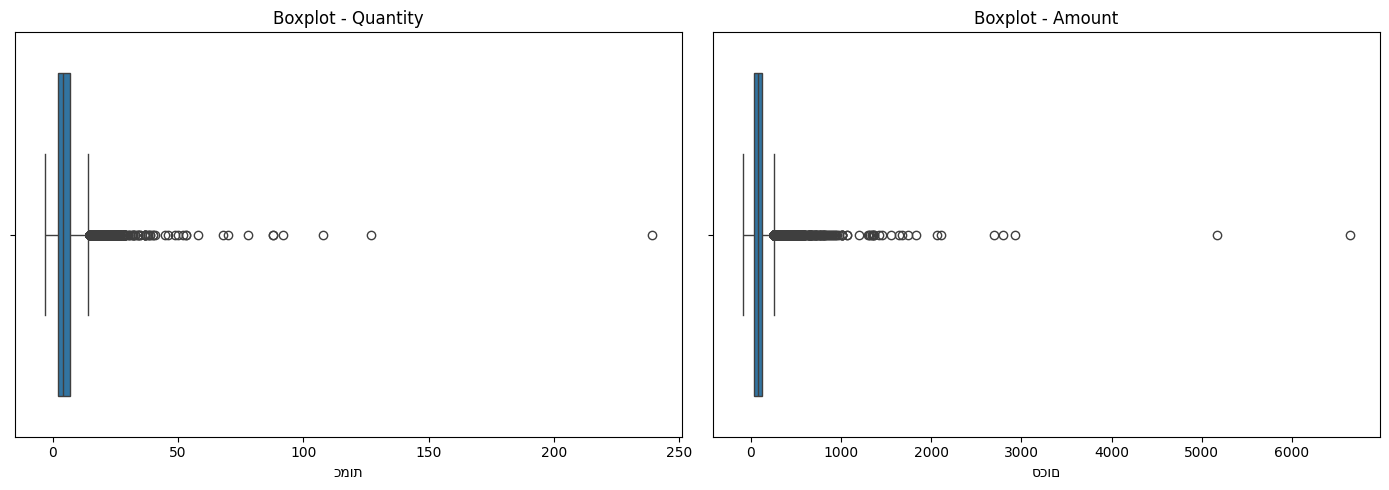

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_all_years['כמות'])
plt.title('Boxplot - Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_all_years['סכום'])
plt.title('Boxplot - Amount')

plt.tight_layout()
plt.show()